In [905]:
%matplotlib inline
import os
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit
from sklearn.model_selection import train_test_split

## Open MNIST data and create a subset with desired digits
MNIST dataset contains 70,000 images of hand-written digits from 0 to 9. Each image has a grey-scale resolution of 28 $\times$ 28 (i.e., 784 pixels). Each pixel has an integer value ranging from 0 (bright) to 255 (dark).

<font color=red>Change the code below to select a different subset </font>

In [906]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.asarray([int(numeric_string) for numeric_string in y])


# Change the conditions below to compare between other two digits.
class1Indices = (y==0)
class2Indices = (y==1)

x1 = X[class1Indices]
x2 = X[class2Indices]

Xtrain = np.concatenate((x1,x2),axis=0)
ytrain = np.concatenate((np.zeros(x1.shape[0]),np.ones(x2.shape[0])),axis=0) # associating 0's with 0 and 1's with 1

# Saving the temporary variables for fast retrieval
with open('temp.pickle', 'wb') as handle:
    pickle.dump([Xtrain, ytrain], handle)



c:\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# Split the data to training, testing, and validation subsets
## Component 1.1 - 70% training, 10% validation, and 20% test

In [1075]:
# loading the temporary variables for fast retrieval
with open('temp.pickle', 'rb') as handle:
    Xtrain, ytrain = pickle.load(handle)
    
# Split the data to training, testing, and validation subsets

# First split - 70% training and 30% temporary
X_train, X_temp, y_train, y_temp = train_test_split(Xtrain, ytrain,test_size=0.3, random_state=2)

# Second split - 30% temporary into 20% test and 10% validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=2) 

# X_train & y_train = 70%, X_test & y_test = 20%, X_val & y_val = 10%

Nsamples = X_train.shape[0] # samples = 10346 for 0 and 1's subset
Nfeatures = X_train.shape[1] # features = 784



# Accuracy of a classifier
## Component 1.2 - write function "testLinearClassifier" that taking a (weights), X (test dataset), and y (label)

In [1138]:
from numpy import size


def testLinearClassifier(a,Xt,yt):
    
    # YOUR CODE HERE
    """
    Parameters:
    - a: Coefficients of the linear classifier (w0)
    - X: Test dataset (X_test)
    - y: True labels for the test dataset (np array)
    """
    
        #Xtrain = np.c_[np.ones((Xtrain.shape[0], 1)), Xtrain]
    
    #X_bias = np.append(Xtrain[0], np.ones(Xtrain.shape[1]),axis=0)
    
    #Xt = np.reshape(Xt,(Xt.shape[0],1))
    #a0 = at[0] # a0 = bias term
    
    
   
    #a = np.transpose(a)
    # Calculate the predicted labels using the weights
    predictions = np.dot(Xt,a).flatten()
    if(a.size > 785):
        #a = np.transpose(a)
        wt, w0 = np.split(a,2,axis=1)
        #wt.flatten()
        #w0.flatten()
        predictions = np.dot(Xt,wt)+np.dot(Xt,w0)
        predictions = predictions.flatten()
        
    #np.delete(predictions,[-1])
     # Debug
    print("\nShapes - Xt shape:", Xt.shape, "a:", a.shape,  "Predictions:", size(predictions,0))
    # Convert predictions to binary (0 or 1)
    predicted_labels = np.where(predictions > 0, 1, 0)
    print("\nPredicted_lables size: ", predicted_labels.shape, "true y: ", size(yt,0))
    #predicted_labels = np.transpose(predicted_labels)
    
    # Total number of misclassifications
    # misclassifications = np.sum(predicted_labels != yt)
    misclassifications = np.sum(predicted_labels != yt)
    
    return misclassifications


## Define and test gaussianClassifierWithIdentityCovariance 
## With Discriminant:
$$y(\mathbf x) = \underbrace{(\mu_2-\mu_1)^T}_{\mathbf w^T} ~\mathbf x- \underbrace{\mathbf w^T\left(\frac{\mu_1+\mu_2}{2}\right)}_{w_0}$$

wt:  (784,)
w0:  (784,)
wt shape: (784,)
w0 shape: (784,)
a shape: (1568,)

Shapes - Xt shape: (10346, 784) a: (784, 2) Predictions: 10346

Predicted_lables size:  (10346,) true y:  10346

Shapes - Xt shape: (1478, 784) a: (784, 2) Predictions: 1478

Predicted_lables size:  (1478,) true y:  1478

Shapes - Xt shape: (2956, 784) a: (784, 2) Predictions: 2956

Predicted_lables size:  (2956,) true y:  2956

y1 train misclass: 4984, 48.173%
y1 test misclass: 1432, 13.841%
y1 val misclass: 716, 6.921%


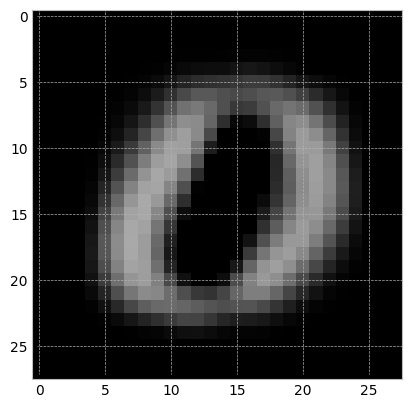

In [1186]:
#------TRAINING CODE --------------

import array
from turtle import color
from matplotlib.cbook import flatten
from matplotlib.pyplot import cool
from numpy import float64


def gaussianClassifierWithIdentityCovariance(Xtrain1,ytrain1):
    # X*I=X, the result is the original matrix, hence:
    #X_train_bias = np.c_[Xtrain1,np.ones(Xtrain1,shape=Xtrain1.shape[1])] # add column
    # Separate the data into two classes
    class_1_data =  Xtrain1[ytrain1 == 0]
    class_2_data = Xtrain1[ytrain1 == 1]
    # Create mean subtracted arrays
    class_mean = np.mean(Xtrain1,axis=0)
    mu1 = np.mean(class_1_data,axis=0)
    mu2 = np.mean(class_2_data,axis=0)
      
    # Discriminate function coefficients
    wt = (mu1-mu2)
    print("wt: ", wt.shape)
    wt = np.transpose(wt)
    
    w0 = wt*-0.5*(mu1+mu2)
    print("w0: ", w0.shape)
    #a1 = np.append([wt],[w0],axis=0)
    a1 = np.concatenate((wt,w0),axis=0)
    #np.reshape(a1[0:1568],(-1,784))
    
    
    print("wt shape:", wt.shape)
    print("w0 shape:", w0.shape)
    print("a shape:", a1.shape)
   # print("class1_demeaned shape:", class1_demeaned.shape)
    
    
    return a1
    #YOUR CODE HERE


#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a1 = gaussianClassifierWithIdentityCovariance(X_train,y_train)
wt,w0 = np.split(a1,2,axis=0)
plt.imshow(np.reshape(a1[0:784],(28,28)),cmap='gray',vmin=0,vmax=255)
#plt.imshow(np.reshape(w0[0:784],(28,28)),cmap='grey',vmin=0,vmax=255)
a1 = np.reshape(a1,(784,-1))
#a1 = np.transpose(a1)
train = testLinearClassifier(a1,X_train,y_train)
val = testLinearClassifier(a1,X_val,y_val)
test = testLinearClassifier(a1,X_test,y_test)
print(f'\ny1 train misclass: {train}, {train/Nsamples*100:.3f}%')
print(f"y1 test misclass: {test}, {test/Nsamples*100:.3f}%")
print(f'y1 val misclass: {val}, {val/Nsamples*100:.3f}%')






## Define and test gaussianClassifierWithCommonCovariance 

Complete your code
cov shape:  (784, 784)
cov inv shape:  (784, 784)
a2 shape: (784,)

Shapes - Xt shape: (10346, 784) a: (784,) Predictions: 10346

Predicted_lables size:  (10346,) true y:  10346

Shapes - Xt shape: (1478, 784) a: (784,) Predictions: 1478

Predicted_lables size:  (1478,) true y:  1478

Shapes - Xt shape: (2956, 784) a: (784,) Predictions: 2956

Predicted_lables size:  (2956,) true y:  2956

y1 train misclass:  56, 0.541%
y1 test misclass:  13, 0.126%
y1 val misclass:  5, 0.048%


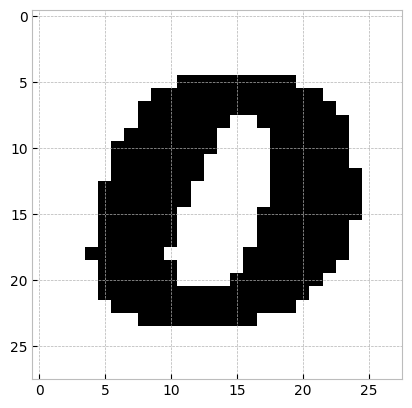

In [1188]:
#------TRAINING CODE --------------

from xml.etree.ElementTree import tostring
from matplotlib import axes
from numpy import str_


def gaussianClassifierWithCommonCovariance(X_train2,y_train2):

    a = 0.01*np.random.randn(Nfeatures,1)
    print("Complete your code")
    """
    Gaussian classifier with a common covariance matrix.

    Parameters:
    - X_train: Training dataset (numpy array)
    - y_train: Labels for the training dataset (numpy array)

    Returns:
    - a2: Coefficients of the linear classifier [w^T, w0] (numpy array)
    """

    # Separate the data into two classes
    class_1_data = X_train2[y_train2 == 0]
    class_2_data = X_train2[y_train2 == 1]

    # Estimate the mean vectors
    mu1 = np.mean(class_1_data, axis=0)
    mu2 = np.mean(class_2_data, axis=0)
       
   
    # # Create mean subtracted arrays
    # class_mean = np.mean(X_train2,axis=0)
    
    class1_demeaned = class_1_data-mu1
    class2_demeaned = class_2_data-mu2

    # # Compute the combined covariance matrix, assuming it to be diagonal
    class_combined_demeaned = np.concatenate((class1_demeaned,class2_demeaned),axis=0)
    std = np.std(class_combined_demeaned,axis=0)
    

    # Estimate the common covariance matrix
    cov_matrix = np.cov(mu2-mu1,rowvar=False)+1e-4*np.eye(Nfeatures) # single matrix solution (not divide by zero)
    print("cov shape: ", cov_matrix.shape)
    
    # Discriminant function coefficients
    cov_inv = np.linalg.inv(cov_matrix)
    
    print("cov inv shape: ", cov_inv.shape)
    a2 = cov_inv @ (mu2-mu1)
    print(f"a2 shape: {a2.shape}")
    return a2
    
    #return a
    #YOUR CODE HERE


#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a2 = gaussianClassifierWithCommonCovariance(X_train,y_train)

plt.imshow(np.reshape(a2[0:784],(28,28)),cmap='gray',vmin=0,vmax=255)
#a2 = np.append(a2,1)
#a2 = np.reshape(a2,(784,-1))


train = testLinearClassifier(a2,X_train,y_train)
val = testLinearClassifier(a2,X_val,y_val)
test = testLinearClassifier(a2,X_test,y_test)
print(f'\ny1 train misclass:  {train}, {train/Nsamples*100:.3f}%')
print(f"y1 test misclass:  {test}, {test/Nsamples*100:.3f}%")
print(f'y1 val misclass:  {val}, {val/Nsamples*100:.3f}%')

Test Accuracy:  0.998
Test Precision: 0.998
Test Recall:    0.998
TestF-score:   0.998

Val Accuracy:  0.999
Val Precision: 0.999
Val Recall:    0.999
ValF-score:   0.999


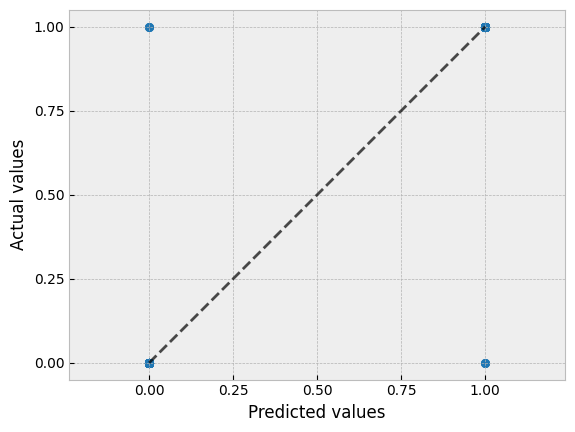

In [1145]:
import numpy as np
from dataclasses import dataclass

from sklearn.metrics import PredictionErrorDisplay

@dataclass
class LogisticRegression:
    epochs: int
    learning_rate: float
    threshold: float
    logging: bool

    def sigmoid(self, predictions: np.ndarray) -> np.ndarray:
        """The numerically stable implementation of the Sigmoid activation function."""

        neg_mask = predictions < 0
        pos_mask = ~neg_mask

        zs = np.empty_like(predictions)
        zs[neg_mask] = np.exp(predictions[neg_mask])
        zs[pos_mask] = np.exp(-predictions[pos_mask])

        res = np.ones_like(predictions)
        res[neg_mask] = zs[neg_mask]

        return res / (1 + zs)+1e-4

    def mean_log_loss(self, predictions: np.ndarray, labels: np.ndarray) -> np.float32:
        """Computes the mean Cross Entropy Loss (in binary classification, also called Log-loss)."""

        return -(labels * np.log(predictions) + (1 - labels) * np.log(1 - predictions)).mean()

    def fit(self, features: np.ndarray, labels: np.ndarray) -> None:
        """Fits the Logistic Regression model."""

        num_samples, num_features = features.shape
        self.weights, self.bias = np.zeros(num_features), 0

        for epoch in range(self.epochs):
            prediction = self.sigmoid(features.dot(self.weights) + self.bias)
            difference = prediction - labels  # type: ignore

            d_weights = features.T.dot(difference) / num_samples
            d_bias = difference.sum() / num_samples

            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias

            if self.logging:
                print(f"Mean Log-loss [{epoch}]: {self.mean_log_loss(prediction, labels):.3f}")

    def predict(self, features: np.ndarray) -> np.ndarray:
        """Performs inference using the given features."""

        return np.where(self.sigmoid(features.dot(self.weights) + self.bias) < self.threshold, 0, 1)  # type: ignore


if __name__ == "__main__":
    import matplotlib.pyplot as plt

    
    from sklearn.metrics import accuracy_score, precision_recall_fscore_support
   

    #plt.style.use("bmh")


    logistic_regression = LogisticRegression(
        learning_rate=1e-4,
        epochs=100,
        threshold=0.5,
        logging=False,
    )
    logistic_regression.fit(X_train, y_train)  # type: ignore
    predictions = logistic_regression.predict(X_test)  # type: ignore

    accuracy = accuracy_score(y_test, predictions)
    precision, recall, fscore, _ = precision_recall_fscore_support(
        y_test, predictions, average="macro"
    )

    print(f"Test Accuracy:  {accuracy:.3f}")
    print(f"Test Precision: {precision:.3f}")
    print(f"Test Recall:    {recall:.3f}")
    print(f"TestF-score:   {fscore:.3f}\n")
    PredictionErrorDisplay(y_true=y_test,y_pred=predictions).plot(kind='actual_vs_predicted')

 
    logistic_regression.fit(X_val, y_val)  # type: ignore
    predictions = logistic_regression.predict(X_val)  # type: ignore
    accuracy = accuracy_score(y_val, predictions)
    precision, recall, fscore, _ = precision_recall_fscore_support(
        y_val, predictions, average="macro"
    )
    
    
    print(f"Val Accuracy:  {accuracy:.3f}")
    print(f"Val Precision: {precision:.3f}")
    print(f"Val Recall:    {recall:.3f}")
    print(f"ValF-score:   {fscore:.3f}")
  
    

## Define and test logisticRegression 

You may choose the step size as 1e-4. You can try changing it.

Use the expit() function from scipy.special.expit to implement sigmoid without overflow errors 


Shapes - Xt shape: (10346, 784) a: (784,) Predictions: 10346

Predicted_lables size:  (10346,) true y:  10346

Shapes - Xt shape: (1478, 784) a: (784,) Predictions: 1478

Predicted_lables size:  (1478,) true y:  1478

Shapes - Xt shape: (2956, 784) a: (784,) Predictions: 2956

Predicted_lables size:  (2956,) true y:  2956

y1 train misclass:  17, 0.164%
y1 test misclass:  5, 0.048%
y1 val misclass:  2, 0.019%


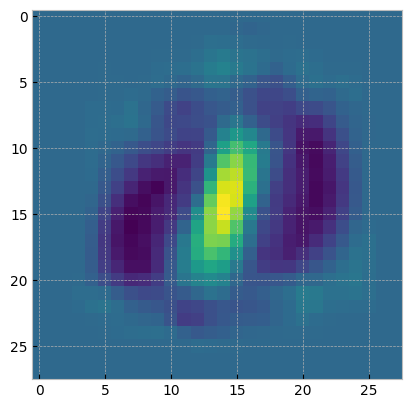

In [1207]:
def logisticRegression(Xtrain,ytrain,iterations=100,step_size=1e-4,verbose=False):
    LogisticRegression.epochs=iterations
    LogisticRegression.learning_rate=step_size
    LogisticRegression.logging=verbose
    logistic_regression.fit(Xtrain, ytrain)  # type: ignore
    for epoch in range(iterations):
        prediction = logistic_regression.sigmoid(np.dot(Xtrain,logistic_regression.weights) + logistic_regression.bias)
        difference = prediction - ytrain  # type: ignore

        d_weights = np.dot(Xtrain.T,difference) / Nsamples
        d_bias = np.sum(difference) / Nsamples

        logistic_regression.weights -= logistic_regression.learning_rate * d_weights
        logistic_regression.bias -= logistic_regression.learning_rate * d_bias
        a3 = logistic_regression.weights
        return a3
    
  
    print("Complete your code")
    
   
    #YOUR CODE HERE
    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a3 = logisticRegression(X_train,y_train,iterations=100,verbose=False)
plt.imshow(np.reshape(a3[0:784],(28,28)))


train = testLinearClassifier(a3,X_train,y_train)
val = testLinearClassifier(a3,X_val,y_val)
test = testLinearClassifier(a3,X_test,y_test)

print(f'\ny1 train misclass:  {train}, {train/Nsamples*100:.3f}%')
print(f"y1 test misclass:  {test}, {test/Nsamples*100:.3f}%")
print(f'y1 val misclass:  {val}, {val/Nsamples*100:.3f}%')


Complete your code


ValueError: shapes (10346,784) and (785,1) not aligned: 784 (dim 1) != 785 (dim 0)

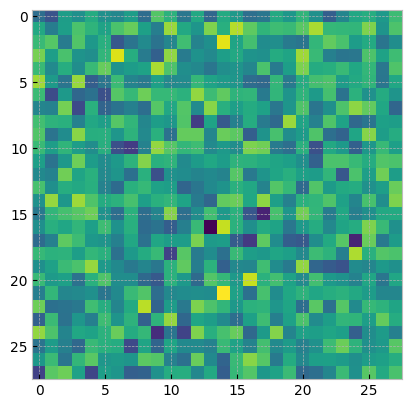

In [1208]:
def logisticRegressionWithRegularization(Xtrain,ytrain,iterations=100,step_size=1e-4,lam=0,verbose=False):


    a = 0.01*np.random.randn(Nfeatures+1,1)
    print("Complete your code")
    
    return a
    #YOUR CODE HERE

    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = logisticRegressionWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=1)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)


In [ ]:
def optimizeHyperparameters(Xtrain,ytrain):
     
        # YOUR CODE HERE
        
    return lamopt


# REPORT TEST ERRORS OF THE BEST MODELS

YOUR CODE BELOW